In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

In [ ]:
data = pd.read_csv(r"/content/faults.csv")
data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [ ]:
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [ ]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
data.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,1


In [ ]:
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
data.isnull().sum()

,0
X_Minimum,0
X_Maximum,0
Y_Minimum,0
Y_Maximum,0
Pixels_Areas,0
X_Perimeter,0
Y_Perimeter,0
Sum_of_Luminosity,0
Minimum_of_Luminosity,0
Maximum_of_Luminosity,0


In [ ]:
data.shape

(1941, 34)

In [ ]:
data.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296,0.164804
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704,0.145783
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,-0.086497,-0.090654,0.025257,0.036488,-0.063327,-0.000420,-0.066601,0.064262,0.126121,-0.084415
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,-0.086480,-0.090666,0.025284,0.036488,-0.063329,-0.000397,-0.066606,0.064262,0.126110,-0.084422
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739,-0.184632
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197,-0.142903
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989,-0.066801
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784


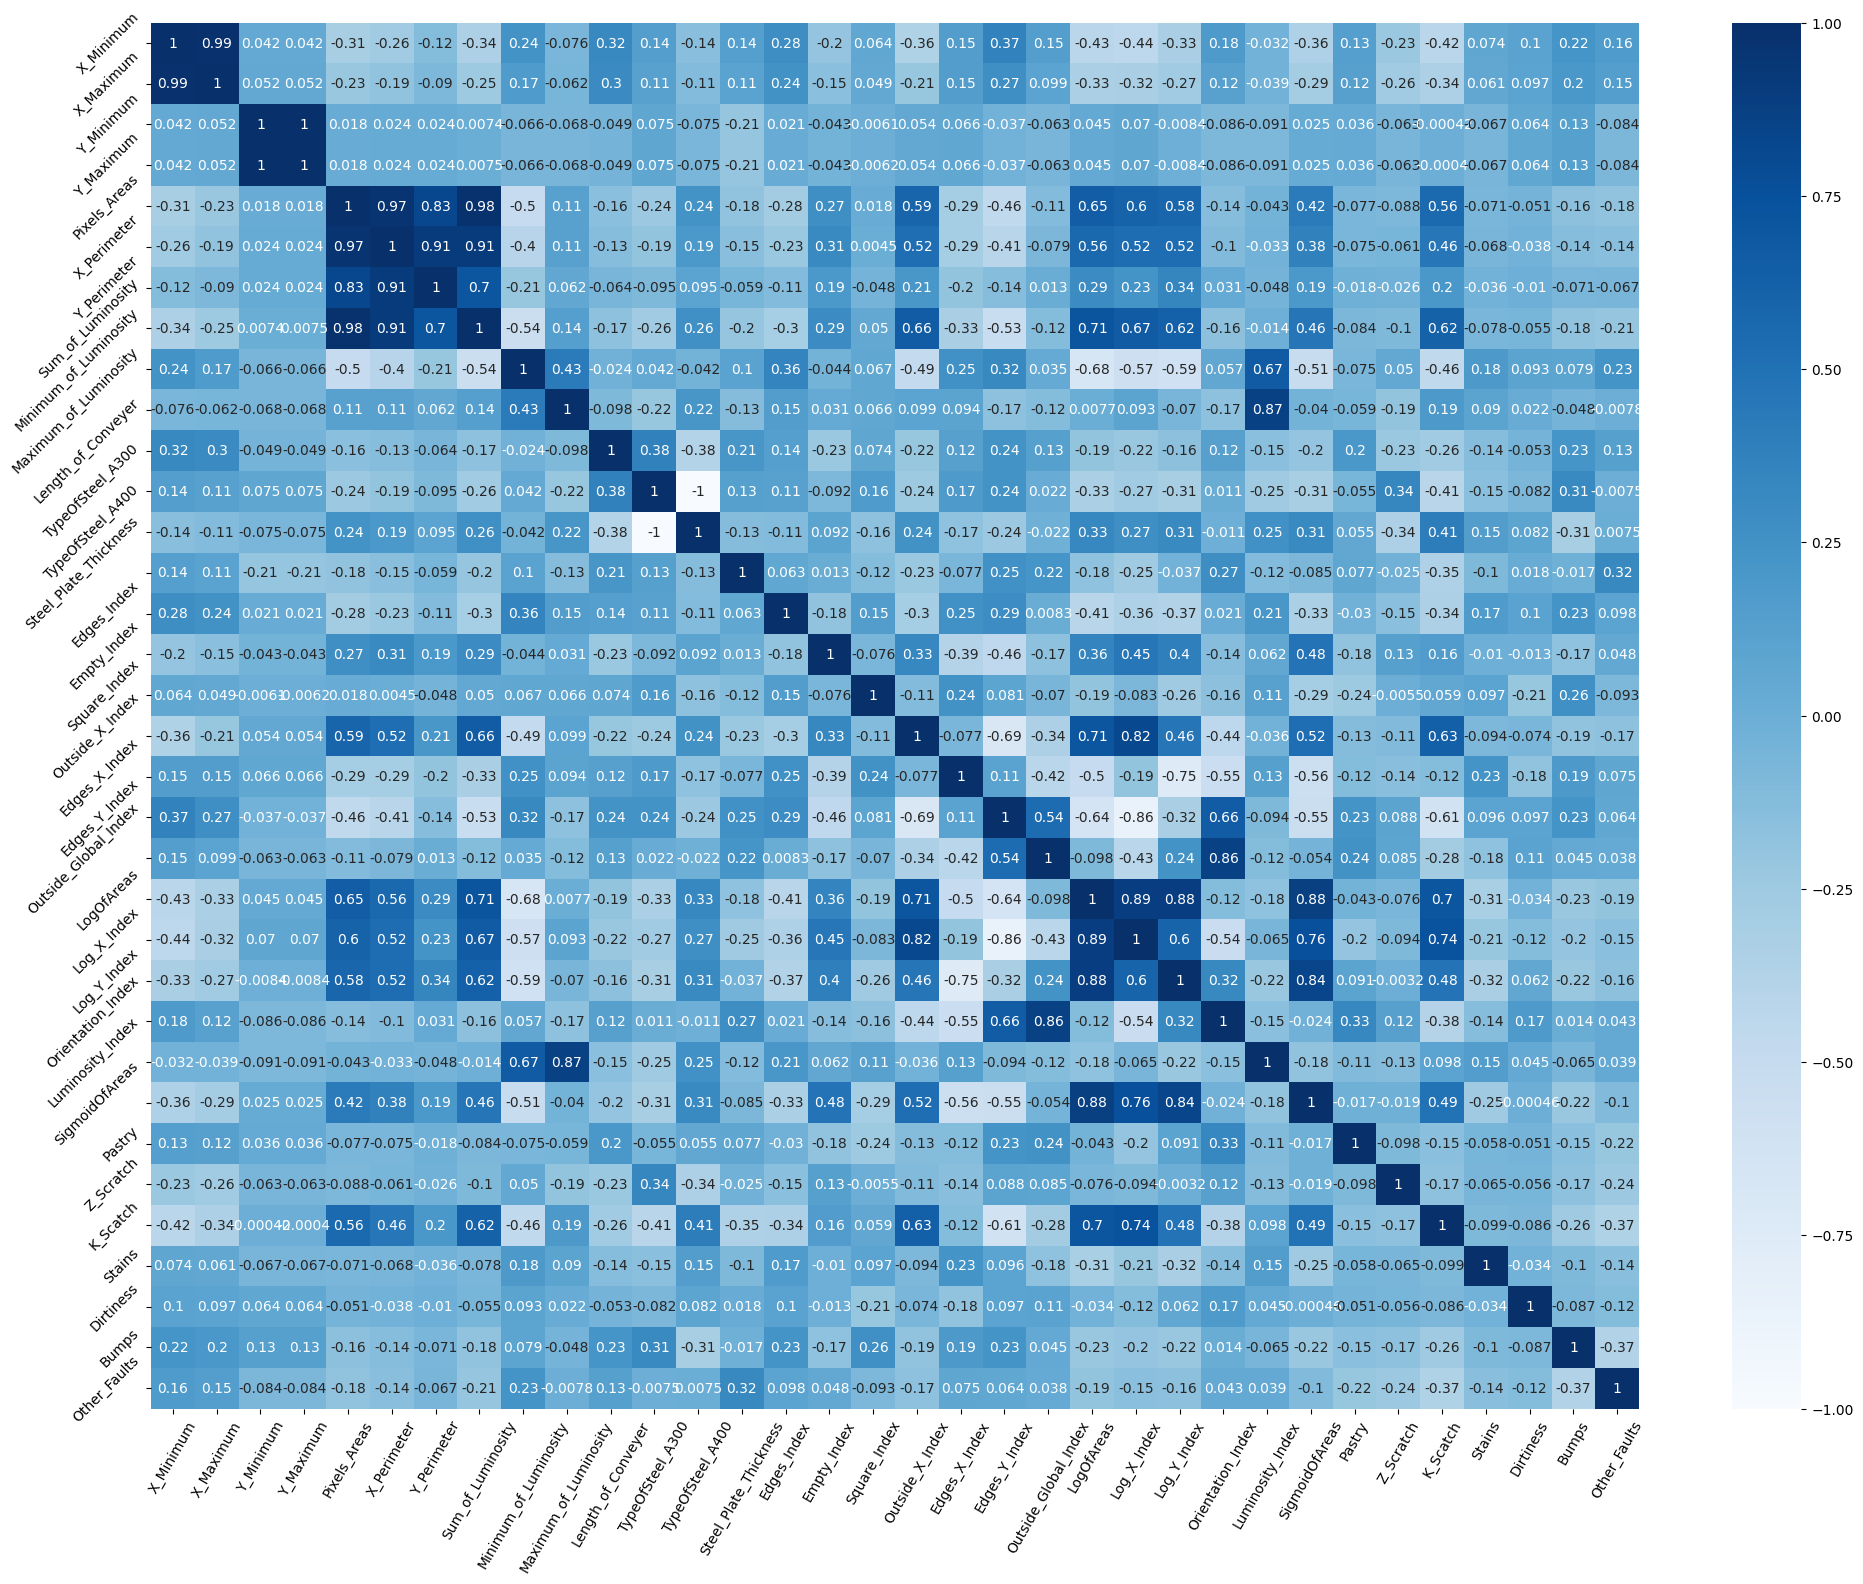

In [ ]:
plt.figure(figsize=(24,18))
sns.heatmap(data.corr(),cmap = 'Blues',annot = True)
plt.xticks(rotation = 60)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
labels = set(data['Other_Faults'])
labels

{0, 1}

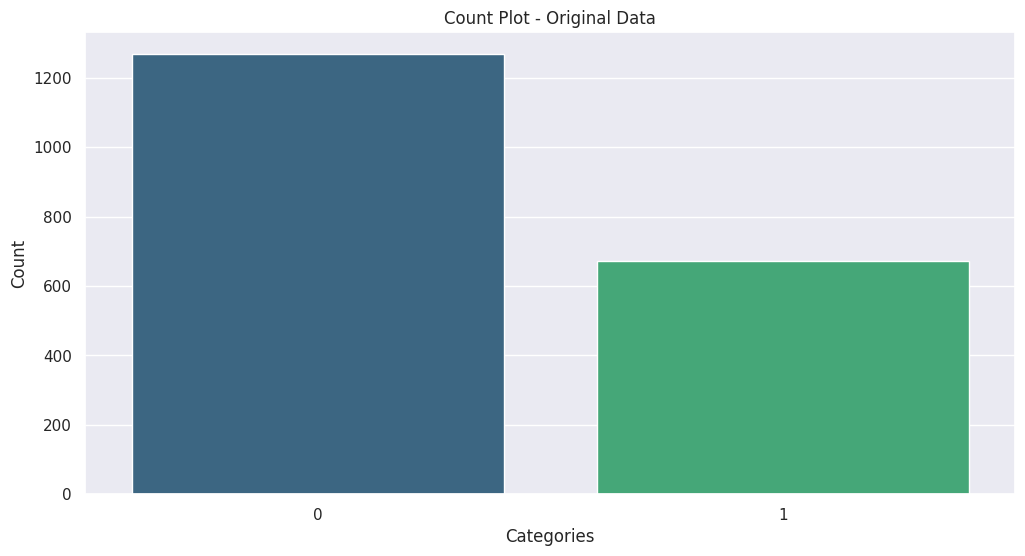

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

ax = sns.countplot(x=data["Other_Faults"], palette="viridis")

plt.title("Count Plot - Original Data")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

In [ ]:
x = data.drop(['Other_Faults'], axis = 1)
x

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,1.2041,-0.4286,0.0026,0.7254,0,0,0,0,0,0
1937,144,175,340581,340598,287,44,24,34599,112,133,...,1.2305,-0.4516,-0.0582,0.8173,0,0,0,0,0,0
1938,145,174,386779,386794,292,40,22,37572,120,140,...,1.1761,-0.4828,0.0052,0.7079,0,0,0,0,0,0
1939,137,170,422497,422528,419,97,47,52715,117,140,...,1.4914,-0.0606,-0.0171,0.9919,0,0,0,0,0,0


In [ ]:
y = data['Other_Faults']
y

,Other_Faults
0,0
1,0
2,0
3,0
4,0
...,...
1936,1
1937,1
1938,1
1939,1


In [ ]:
labels = ['Bumps','Normal']

In [ ]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


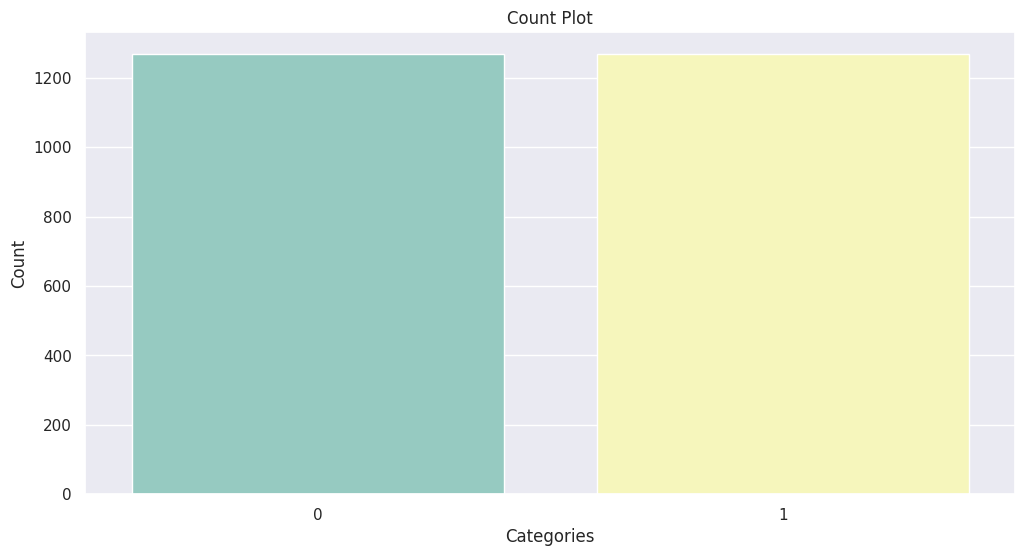

In [ ]:
sns.set(style = "darkgrid")
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = y_resampled, palette = "Set3")
plt.title("Count Plot")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

ax.set_xticklabels(labels)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size = 0.30, random_state = 42)
x_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps
1513,1613,1627,3225473,3225496,137,32,25,15359,103,126,...,1.3617,0.3913,-0.1241,0.5329,0,0,0,0,0,0
1455,789,797,54896,54905,55,10,9,6216,100,132,...,0.9542,0.1111,-0.1170,0.1773,0,0,0,0,0,0
514,93,171,2410724,2410794,2027,255,129,259127,118,141,...,1.8451,-0.1026,-0.0013,1.0000,0,0,1,0,0,0
409,41,226,695578,695788,17706,802,537,2147442,24,148,...,2.3222,0.1191,-0.0525,1.0000,0,0,1,0,0,0
916,1606,1620,3457631,3457651,208,23,21,17619,61,109,...,1.3010,0.3000,-0.3382,0.4630,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1163,1171,2016193,2016200,52,8,7,6293,104,142,...,0.8451,-0.1250,-0.0545,0.1622,0,0,0,0,0,0
1095,355,378,2820561,2820612,631,46,51,68349,91,133,...,1.7076,0.5490,-0.1538,0.9970,0,0,0,0,0,1
1130,1192,1205,521912,521925,101,22,13,11601,108,125,...,1.1139,0.0000,-0.1027,0.2914,0,0,0,0,0,1
1294,14,24,149048,149070,150,12,22,17566,99,140,...,1.3424,0.5454,-0.0851,0.3663,0,0,0,0,0,0


In [ ]:
y_train

,Other_Faults
1513,1
1455,1
514,0
409,0
916,0
...,...
1638,1
1095,0
1130,0
1294,1


In [ ]:
x_test

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps
1607,88,106,327251,327262,109,18,11,11746,100,119,...,1.041400,-0.388900,-0.158100,0.332900,0,0,0,0,0,0
173,144,150,254652,254670,56,16,19,6593,109,126,...,1.255300,0.666700,-0.080200,0.215000,0,1,0,0,0,0
463,41,191,1540695,1540855,12260,660,378,1424210,33,141,...,2.204100,0.062500,-0.092400,1.000000,0,0,1,0,0,0
2352,553,705,2200934,2200943,581,161,47,69074,103,140,...,0.927014,-0.915416,-0.072646,0.995603,0,0,0,0,0,0
2089,1294,1311,2373337,2373357,203,40,26,23706,105,127,...,1.285156,0.187167,-0.090843,0.548507,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,989,1000,800963,800972,68,13,10,7457,91,125,...,0.954200,-0.181800,-0.143300,0.205100,0,0,0,0,0,0
889,99,115,203973,203987,106,25,16,12782,108,134,...,1.146100,-0.125000,-0.057900,0.372500,0,0,0,0,0,1
1349,272,284,226474,226495,187,20,21,13351,49,101,...,1.322200,0.428600,-0.442200,0.417000,0,0,0,0,0,0
1976,692,702,754038,754051,75,18,13,9932,123,142,...,1.121922,0.257911,0.023715,0.240109,0,0,0,0,0,0


In [ ]:
y_test

,Other_Faults
1607,1
173,0
463,0
2352,1
2089,1
...,...
1422,1
889,0
1349,1
1976,1


In [ ]:
x_train.shape

(1775, 33)

In [ ]:
y_train.shape

(1775,)

In [ ]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict)
    plt.figure(figsize =(5, 5))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

KNN Classifier Accuracy    : 67.27989487516426
KNN Classifier Precision   : 67.39478676315605
KNN Classifier Recall      : 67.11343056611598
KNN Classifier FSCORE      : 67.07522401441477

 KNN Classifier classification report
               precision    recall  f1-score   support

       Bumps       0.61      0.68      0.64       331
      Normal       0.73      0.67      0.70       430

    accuracy                           0.67       761
   macro avg       0.67      0.67      0.67       761
weighted avg       0.68      0.67      0.67       761



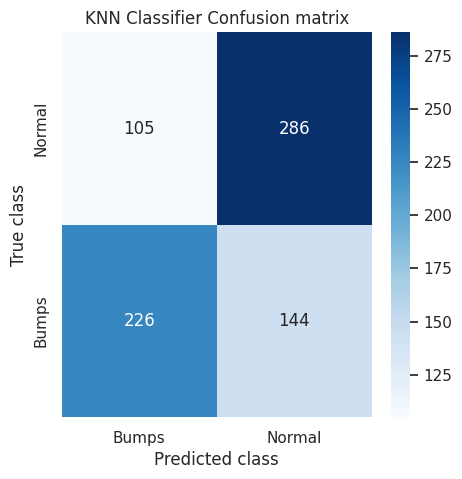

In [ ]:
if os.path.exists('KNN_weights.pkl'):
# Load the model from the pkl file
    classifier= joblib.load('KNN_weights.pkl')
    predict = classifier.predict(x_test)
    performance_metrics("KNN Classifier", predict, y_test)
else:
    # Train the classifier on the training data
    classifier = KNeighborsClassifier(weights='distance',algorithm='ball_tree',leaf_size=3,p=1)
    classifier.fit(x_train, y_train)
    # Make predictions on the test data
    predict=classifier.predict(x_test)
    # Save the model weights to a pkl file
    joblib.dump(classifier, 'KNN_weights.pkl')
    print("KNN classifier_model trained and model weights saved.")
    performance_metrics("KNeighborsClassifier", predict, y_test)

Ridge_classifier Accuracy    : 100.0
Ridge_classifier Precision   : 100.0
Ridge_classifier Recall      : 100.0
Ridge_classifier FSCORE      : 100.0

 Ridge_classifier classification report
               precision    recall  f1-score   support

       Bumps       1.00      1.00      1.00       370
      Normal       1.00      1.00      1.00       391

    accuracy                           1.00       761
   macro avg       1.00      1.00      1.00       761
weighted avg       1.00      1.00      1.00       761



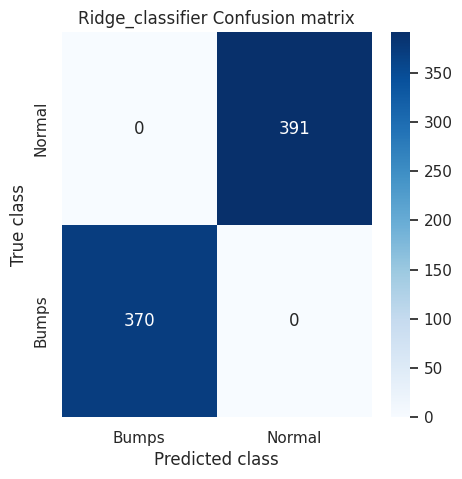

In [ ]:
#ridge_model_path = ('model/RidgeClassifier.pkl')
if os.path.exists('RidgeClassifier.pkl'):
    ridge_classifier = joblib.load('RidgeClassifier.pkl')
    predict = ridge_classifier.predict(x_test)
    performance_metrics("Ridge_classifier", predict, y_test)

else:
    ridge_classifier = RidgeClassifier()
    ridge_classifier.fit(x_train, y_train)

    y_pred_ridge = ridge_classifier.predict(x_test)

    joblib.dump(ridge_classifier, 'RidgeClassifier.pkl')

    performance_metrics('RidgeClassifier', y_pred_ridge, y_test)

In [ ]:
test = pd.read_csv(r"/content/test1.csv")
test

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.9205,0.2791,1.0000,1,0,0,0,0,0,0
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.5000,0.1841,0.3359,1,0,0,0,0,0,0
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.5000,-0.1197,0.5593,1,0,0,0,0,0,0
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.9024,-0.0651,1.0000,1,0,0,0,0,0,0


In [ ]:
test = test.drop(['Other_Faults'], axis=1)
predict = ridge_classifier.predict(test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import pandas as pd
A='Bumps'
B='Normal'
test = pd.read_csv(r"/content/test2.csv")
test = test.drop(['Other_Faults'], axis=1) # Drop the 'Other_Faults' column
predict = classifier.predict(test)
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(test.iloc[i,:],A))
    elif predict[i]== 1:
        print("{} :{} ".format(test.iloc[i, :],B))

X_Minimum                    42.0000
X_Maximum                    50.0000
Y_Minimum                270900.0000
Y_Maximum                270944.0000
Pixels_Areas                267.0000
X_Perimeter                  17.0000
Y_Perimeter                  44.0000
Sum_of_Luminosity         24220.0000
Minimum_of_Luminosity        76.0000
Maximum_of_Luminosity       108.0000
Length_of_Conveyer         1687.0000
TypeOfSteel_A300              1.0000
TypeOfSteel_A400              0.0000
Steel_Plate_Thickness        80.0000
Edges_Index                   0.0498
Empty_Index                   0.2415
Square_Index                  0.1818
Outside_X_Index               0.0047
Edges_X_Index                 0.4706
Edges_Y_Index                 1.0000
Outside_Global_Index          1.0000
LogOfAreas                    2.4265
Log_X_Index                   0.9031
Log_Y_Index                   1.6435
Orientation_Index             0.8182
Luminosity_Index             -0.2913
SigmoidOfAreas                0.5822
P